In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display

# Logistic Regression

## Definition

## Classification Problems (TRADUZIR)

Esquema genérico do classificar supervisionado - treinamento e predição

A figura a seguir ilustra o diagrama do classificador supervisionado multiclasse utilizando regressão logística e softmax.

Podemos identificar os blocos responsáveis pelo treinamento do classificador:
* $\boldsymbol{(Y,X)}$ são os dados rotulados
* $\boldsymbol{W}$, são os parâmetros a serem treinados
* Softmax é o que converte os scores de $\boldsymbol{XW}$ para probabilidades, gerando o $\hat{Y_{OH}}$
* O.H. converte o rótulo original em "one-hot"
* $J$ é a função perda que compara $ Y_{OH}$ e $\hat{Y_{OH}}$ a ser minimizada
* $\Delta_WJ$ é o gradiente que será utilizado para atualizar o $\boldsymbol{W}$ pelo método do gradiente descendente.

Os blocos responsáveis pela predição, uma vez que $\boldsymbol{W}$ já seja treinado:
* Softmax(XW) para calcular as probabilidades
* `Argmax` para escolher a classe de maior probabilidade

$$ Softmax(\boldsymbol{Z}) = \frac{e^{\boldsymbol{Z}}}{\sum_{j=0}^{k-1}e^{z_{i,j}}} $$

In [140]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def softmax(z):
    ez = np.array(np.exp(z))
    return ez/ez.sum(axis=1, keepdims=1)

### J: Função Perda pela Entropia Cruzada

A função a ser minimizada é a função $J$ de perda, que é baseada na Entropia Cruzada (*Cross Entropy*). Dado um conjunto de **amostras anotadas**, isto é, amostras $\boldsymbol{X}$ com
classe $\boldsymbol{Y}$, encontrar os pesos $\boldsymbol{W}$ que minimizam $J$:

$$ J_{\boldsymbol{X,Y}_{TRUE}}(\boldsymbol{W}) = -\frac{1}{n} \sum \boldsymbol{Y}_{TRUE} \odot \log{\boldsymbol{S}(\boldsymbol{XW})}$$
onde $\odot$ é multiplicação ponto-a-ponto de matrizes.

no caso, S tem a predicao (y_hat)

https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

In [141]:
def _loss(y_hat, y):
    return (-1.0/y.shape[0]) * np.sum(y * np.log(y_hat))

### Minimização pelo gradiente descendente

A minimização é feita através do método de gradiente descendente. O gradiente de $J$ é dado por:

$$ \boldsymbol{\Delta J(W)} = - \frac{1}{n} \boldsymbol{X}^T (\boldsymbol{Y}_{TRUE} - \boldsymbol{S(XW)}) $$ 

Os pesos são então ajustados em cada *batch* pela equação onde $\eta$ é denominado de
taxa de aprendizagem: *learning rate*:

$$ \boldsymbol{W} = \boldsymbol{W} - \eta \boldsymbol{\Delta J(W)} $$ 

A cada iteração no programa de minimização abaixo, os pesos são ajustados aplicando-se o
gradiente descendente utilizando todo o conjunto de treinamento. Este esquema é denominado
de "batch gradient descent".

No programa a seguir, o $J$ é implementado pela variável `loss` e o gradiente $\Delta J$ 
é implementado pela variável `Grad`.

In [151]:
def cross_entropy_gradient(X, y, y_hat):
    return (-1.0/y.shape[0]) * (X.T).dot(y - y_hat)


def get_initial_guess(W, X, y):
    if W is None:
        W = np.zeros([X.shape[1], y.shape[1]])
    else:
        # check ig initial guess has a valid number of rows and columns
        if W.shape[0] != X.shape[1] or W.shape[1] != y.shape[1]:
            error_msg = "ERROR: INITIAL GUESS IS NOT THE RIGHT SHAPE.\nExpected(%s, %s) encountered (%s, %s)" % (X.shape[1],
                                                                                                                 y.shape[1],
                                                                                                                 W.shape[0],
                                                                                                                 W.shape[1])
            return error_msg
        else:
            return W
        
    return W

def train(X, y, eta=0.15, iterations=10000, W=None):
    
    # add the bias
    X['bias'] = 1
    
    #convert to numpy as pandas is crazy slow
    X = np.array(X)
    y = np.array(y)
    # y must be dummied, add check for that
    
    W = get_initial_guess(W, X, y)
#     W = np.array(W)
    losses = []
        
    for i in range(iterations):
        scores   = X.dot(W)
        y_hat    = softmax(scores)
        loss     = _loss(y_hat, y)
        gradient = cross_entropy_gradient(X, y, y_hat)
        W = W - (eta * gradient)
        losses.append(loss)
        
    return W, losses
    
    
        
    

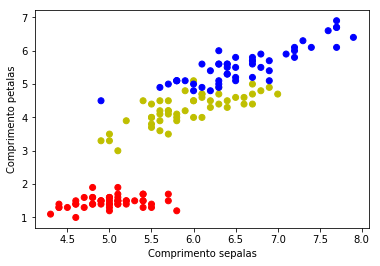

In [152]:
# testando no iris

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Y = iris.target

X = pd.DataFrame(X, columns=['comprimento sepalas','comprimento petalas'])
y = pd.DataFrame(Y, columns=['Type'])
y['Type'] = y['Type'].astype(str)

colors = np.array(['r','y','b'])
plt.scatter(X['comprimento sepalas'], X['comprimento petalas'], c=colors[Y])
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()


Final W: [[ 4.11741611 -0.12543194 -3.99198417]
 [-7.10287364 -0.22131854  7.32419219]
 [ 1.52460768  5.61473112 -7.1393388 ]]
Final loss: 0.10747711677


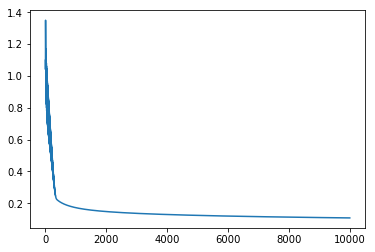

In [153]:
y = pd.get_dummies(y)

W, losses = train(X, y)

print("Final W:", W)
print("Final loss:", losses[-1])
plt.plot(losses)

In [150]:
def predict(X,W):
    S = softmax(X.dot(W))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(S,axis=1)
    return Y_hat

pd.crosstab(predict(X,W), Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


In [176]:
class LogisticRegression(object):
    """LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, iterations=1000):
        self.eta = eta
        self.iterations = iterations
        self.W = None

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self
    
    
    def train(self, X, y):
        
        # add the bias
        X['bias'] = 1

        #convert to numpy
        X = np.array(X)
        y = np.array(y)
        
        # y must be dummied, add check for that

        self.W = get_initial_guess(self.W, X, y)
        self.losses = []

        for i in range(self.iterations):
            scores   = X.dot(self.W)
            y_hat    = softmax(scores)
            loss     = _loss(y_hat, y)
            gradient = cross_entropy_gradient(X, y, y_hat)
            self.W = self.W - (self.eta * gradient)
            self.losses.append(loss)

        return self
    
    
    
    def _sigmoid(z):
        return 1/(1+np.exp(-z))

    def _softmax(z):
        if z.shape[1] > 1:
            ez = np.array(np.exp(z))
            return ez/ez.sum(axis=1, keepdims=1)
        else:
            return sigmoid(z)

    def _loss(self, y_hat, y):
        return (-1.0/y.shape[0]) * np.sum(y * np.log(y_hat))
    
    
    def cross_entropy_gradient(self, X, y, y_hat):
        return (-1.0/y.shape[0]) * (X.T).dot(y - y_hat)


    def set_initial_guess(self, X, y, W=None):
        if W is None:
            self.W = np.zeros([X.shape[1], y.shape[1]])
        else:
            # check if initial guess has a valid number of rows and columns
            if W.shape[0] != X.shape[1] or W.shape[1] != y.shape[1]:
                error_msg = "ERROR: INITIAL GUESS IS NOT THE RIGHT SHAPE.\nExpected(%s, %s) encountered (%s, %s)" % (X.shape[1],
                                                                                                                     y.shape[1],
                                                                                                                     W.shape[0],
                                                                                                                     W.shape[1])
                return error_msg
            else:
                self.W = W
                
    def predict(self,X):
        S = softmax(X.dot(self.W))
        # escolhe a maior probabilidade entre as classes
        Y_hat = np.argmax(S,axis=1)
        return Y_hat
    
    

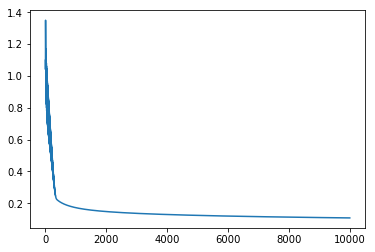

In [178]:
lr = LogisticRegression()
lr.eta = 0.15
lr.iterations = 10000
lr.train(X,y)
plt.plot(lr.losses)